# Exploratory Analysis For Online News Popularity - A deep insight analysis

In [1]:
# Libaries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.model_selection import learning_curve, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, accuracy_score, plot_confusion_matrix,classification_report
kfold = KFold(n_splits=5)

import warnings
warnings.filterwarnings('ignore')

# Reading the data


In [2]:
#quickly explore and get a sense of the contents
df = pd.read_csv('OnlineNewsPopularity.csv')
#return the first few rows of the DataFrame
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Data Processing

In [3]:
#Displays
#the names of the columns,
#the data types they contain 
#any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
#number of rows followed by the number of columns
df.shape

(39644, 61)

In [5]:
#summary statistics for numerical columns 
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [8]:
# Here we drop the two non-preditive (url and timedelta) attributes. They won't contribute anything
df.drop(labels=['url','timedelta'], axis = 1, inplace=True)

In [9]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
# create label grades for the classes
#df['Shares_category']=pd.cut(df.iloc[:,-1],bins=[0,645,861,1400,31300], labels=['Low','Medium','High','Excellent'])

In [11]:
df['Shares_category']=pd.cut(df.iloc[:,-1],bins=[0,946,1400,2800,843300], labels=['Low','Medium','High','Excellent'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   n_tokens_title                 39644 non-null  float64 
 1   n_tokens_content               39644 non-null  float64 
 2   n_unique_tokens                39644 non-null  float64 
 3   n_non_stop_words               39644 non-null  float64 
 4   n_non_stop_unique_tokens       39644 non-null  float64 
 5   num_hrefs                      39644 non-null  float64 
 6   num_self_hrefs                 39644 non-null  float64 
 7   num_imgs                       39644 non-null  float64 
 8   num_videos                     39644 non-null  float64 
 9   average_token_length           39644 non-null  float64 
 10  num_keywords                   39644 non-null  float64 
 11  data_channel_is_lifestyle      39644 non-null  float64 
 12  data_channel_is_entertainment  3

In [13]:
# Merging the weekdays columns channels as one single column
publishdayMerge=df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]
temp_arr=[]
for r in list(range(publishdayMerge.shape[0])):
    for c in list(range(publishdayMerge.shape[1])):
        if ((c==0) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Tueday')
        elif ((c==2) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (publishdayMerge.iloc[r,c])==1):
            temp_arr.append('Sunday')

In [14]:
# Merging the data channels as one single column
DataChannelMerge=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world' ]]
#logic to merge data channel
DataChannel_arr=[]
for r in list(range(DataChannelMerge.shape[0])):
    if (((DataChannelMerge.iloc[r,0])==0) and ((DataChannelMerge.iloc[r,1])==0) and ((DataChannelMerge.iloc[r,2])==0) and ((DataChannelMerge.iloc[r,3])==0) and ((DataChannelMerge.iloc[r,4])==0) and ((DataChannelMerge.iloc[r,5])==0)):
        DataChannel_arr.append('Others')
    for c in list(range(DataChannelMerge.shape[1])):
        if ((c==0) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Lifestyle')
        elif ((c==1) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Entertainment')
        elif ((c==2) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Business')
        elif ((c==3) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Social Media')
        elif ((c==4) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('Tech')
        elif ((c==5) and (DataChannelMerge.iloc[r,c])==1):
            DataChannel_arr.append('World')

In [15]:
# merge the the new data into the dataframe
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=DataChannel_arr)

In [16]:
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)

In [17]:
df.shape

(39644, 49)

In [18]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'weekdays', 'data_channel', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'ab

## check the class balance

<AxesSubplot:xlabel='Shares_category', ylabel='count'>

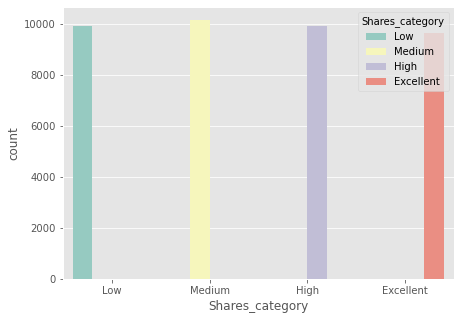

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='Shares_category',hue="Shares_category",data=df,palette="Set3")

In [20]:
# Fetch the counts for each class
class_counts = df.groupby('Shares_category').size().reset_index()
class_counts.columns = ['Shares_category','No of articles']
class_counts

,Shares_category,No of articles
0,Low,9930
1,Medium,10152
2,High,9932
3,Excellent,9630


## Data Visualization
Evaluating the hypothesis

In [21]:
# Visualizaing the "low" expectation hypothesis
# n_non_stop_words

df['n_non_stop_words'].describe()
# Comment - Visualizing the n_non_stop_words data field shows that the present of a record with 1042 value, 
# futher observation of that data shows that it belongs to entertainment which is not actually. It belongs to world news or others.
# this particluar also contains 0 on a lot of attributes. This record is classifed as a noise and will be remove.
data = df[df['n_non_stop_words'] != 1042]
# Here, we will go ahead and drop the field of ' n_non_stop_words'
df.drop(labels=['n_non_stop_words'], axis = 1, inplace=True)

In [22]:
# remove noise from n_tokens_content. those equals to 0
df = df[df['n_tokens_content'] != 0]
print ("After noise removal - ",df.shape)

After noise removal -  (38463, 48)


In [23]:
df['n_non_stop_unique_tokens'].describe()


count    38463.000000
mean         0.710336
std          3.312293
min          0.119134
25%          0.632588
50%          0.693727
75%          0.756944
max        650.000000
Name: n_non_stop_unique_tokens, dtype: float64

<AxesSubplot:xlabel='Shares_category', ylabel='n_non_stop_unique_tokens'>

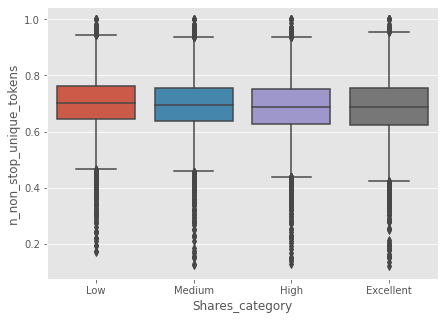

In [24]:
fig, axes = plt.subplots(figsize=(7,5))
# box plot
df = df[df['n_non_stop_unique_tokens'] <= 1]
sns.boxplot(x='Shares_category', y='n_non_stop_unique_tokens', data=df, ax=axes)
# box plot of the dataset shows majority (75%) of the data inrespective of their shares is in the range of 0.6 - 0.8.
# So does it offers any uniques? No, it doesn't.


<AxesSubplot:xlabel='avg_positive_polarity', ylabel='shares'>

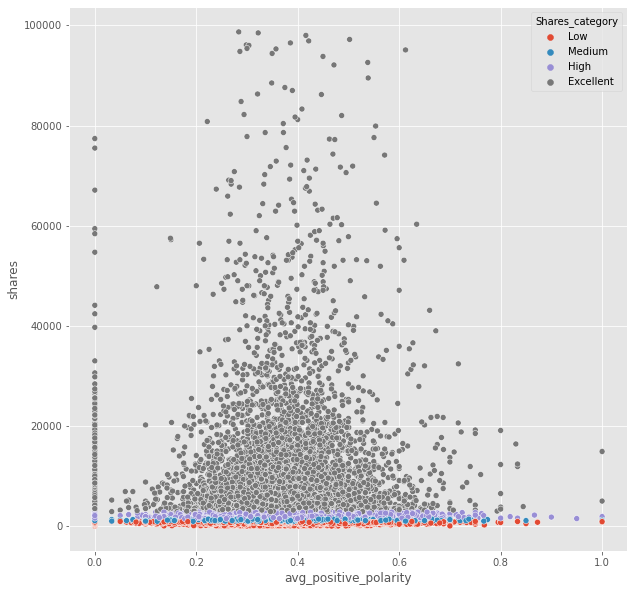

In [25]:
fig, axes = plt.subplots(figsize=(10,10))
temp_data = data[data['shares'] <= 100000]
sns.scatterplot(x='avg_positive_polarity', y='shares', hue='Shares_category', data=temp_data, ax=axes)

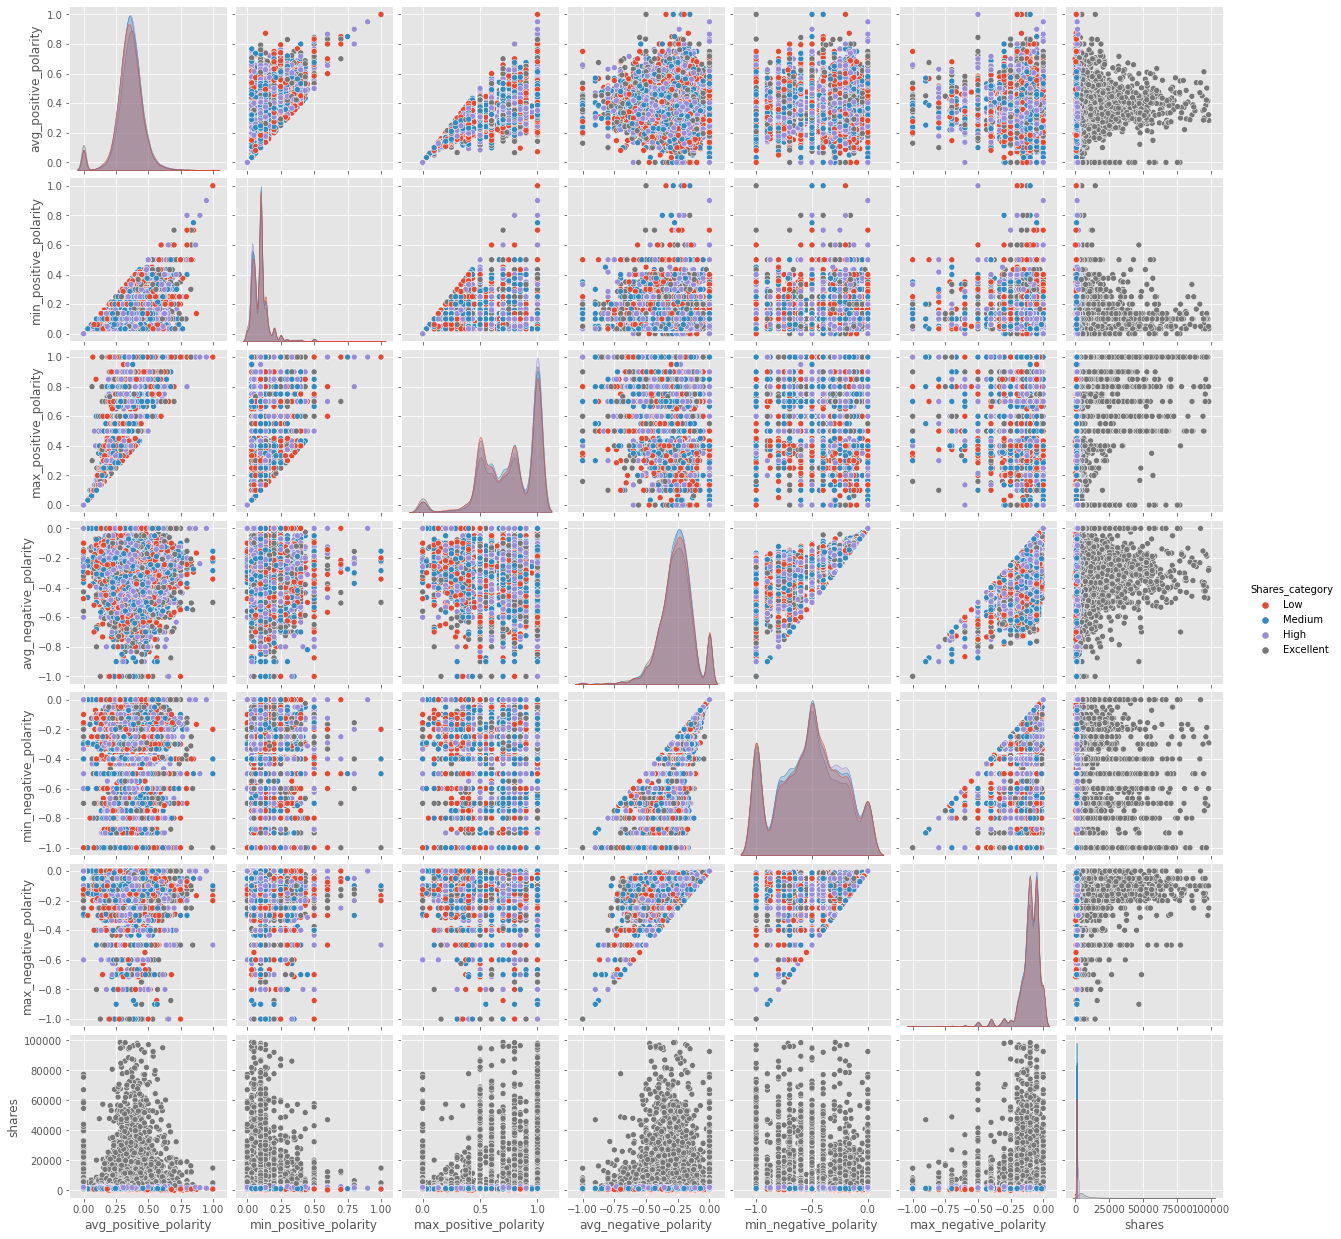

In [26]:
#Finding relationship between 'rate_positive_words', 'rate_negative_words', 'global_rate_positive_words', 'global_rate_negative_words', and 'shares'
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the terms
kw_cols = ['avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='Shares_category', diag_kind='kde')

<AxesSubplot:xlabel='title_sentiment_polarity', ylabel='shares'>

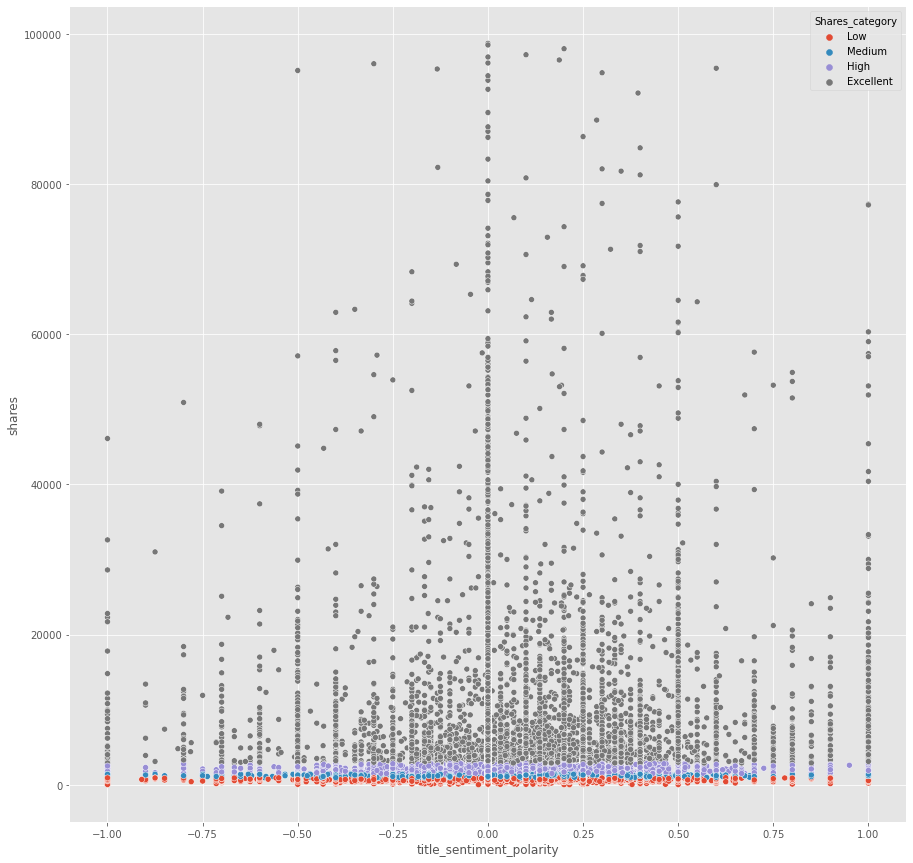

In [27]:
# attempt title_subjectivity
temp_data = data[data['shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.scatterplot(x='title_sentiment_polarity', y='shares', hue='Shares_category', data=temp_data, ax=axes)

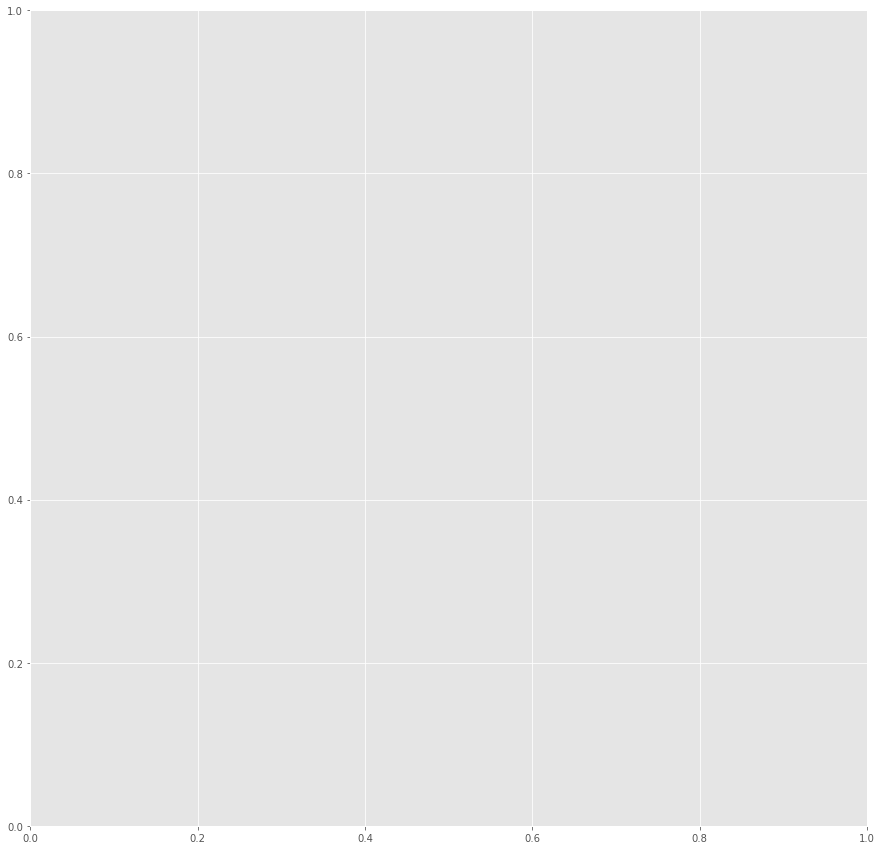

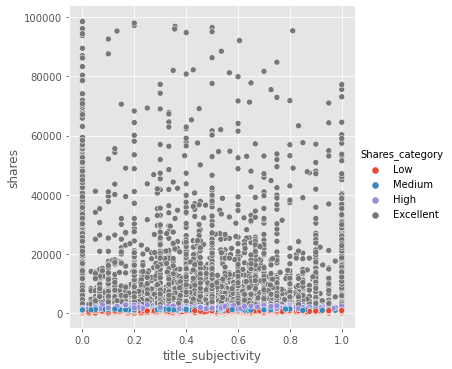

In [28]:
# attempt title_subjectivity
temp_data = data[data['shares'] <= 100000]
fig, axes = plt.subplots(figsize=(15,15))
sns.relplot(x='title_subjectivity', y='shares', hue='Shares_category', data=temp_data, ax=axes)

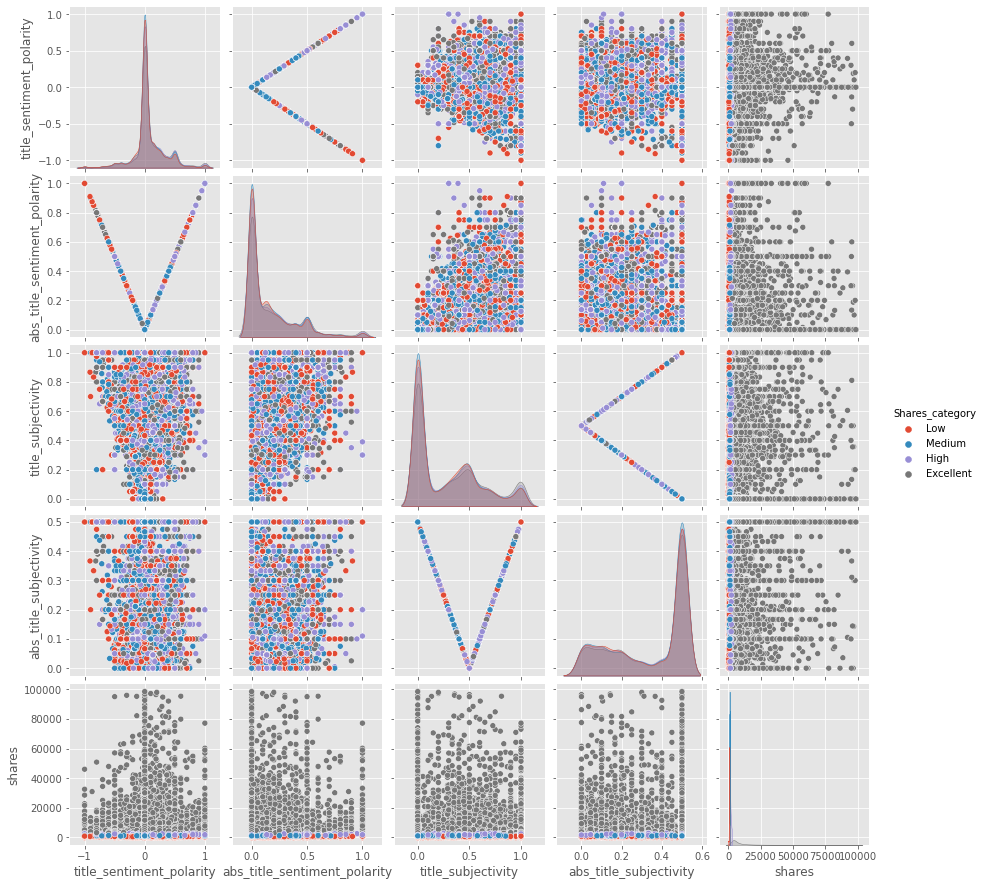

In [29]:
temp_data = data[data['shares'] <= 100000]
# running a pair plot for the kw__terms
kw_cols = ['title_sentiment_polarity', 'abs_title_sentiment_polarity', 'title_subjectivity', 'abs_title_subjectivity', 'shares']
# run a pairplot
sns.pairplot(temp_data, vars=kw_cols, hue='Shares_category', diag_kind='kde')

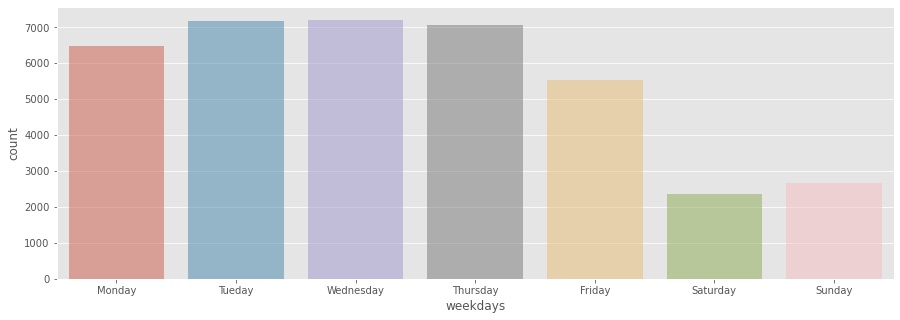

In [30]:
# shows the days when articles are usually posted
fig, axes = plt.subplots(figsize=(15,5))
ax = sns.countplot(x='weekdays',data=df,alpha=0.5, ax=axes)

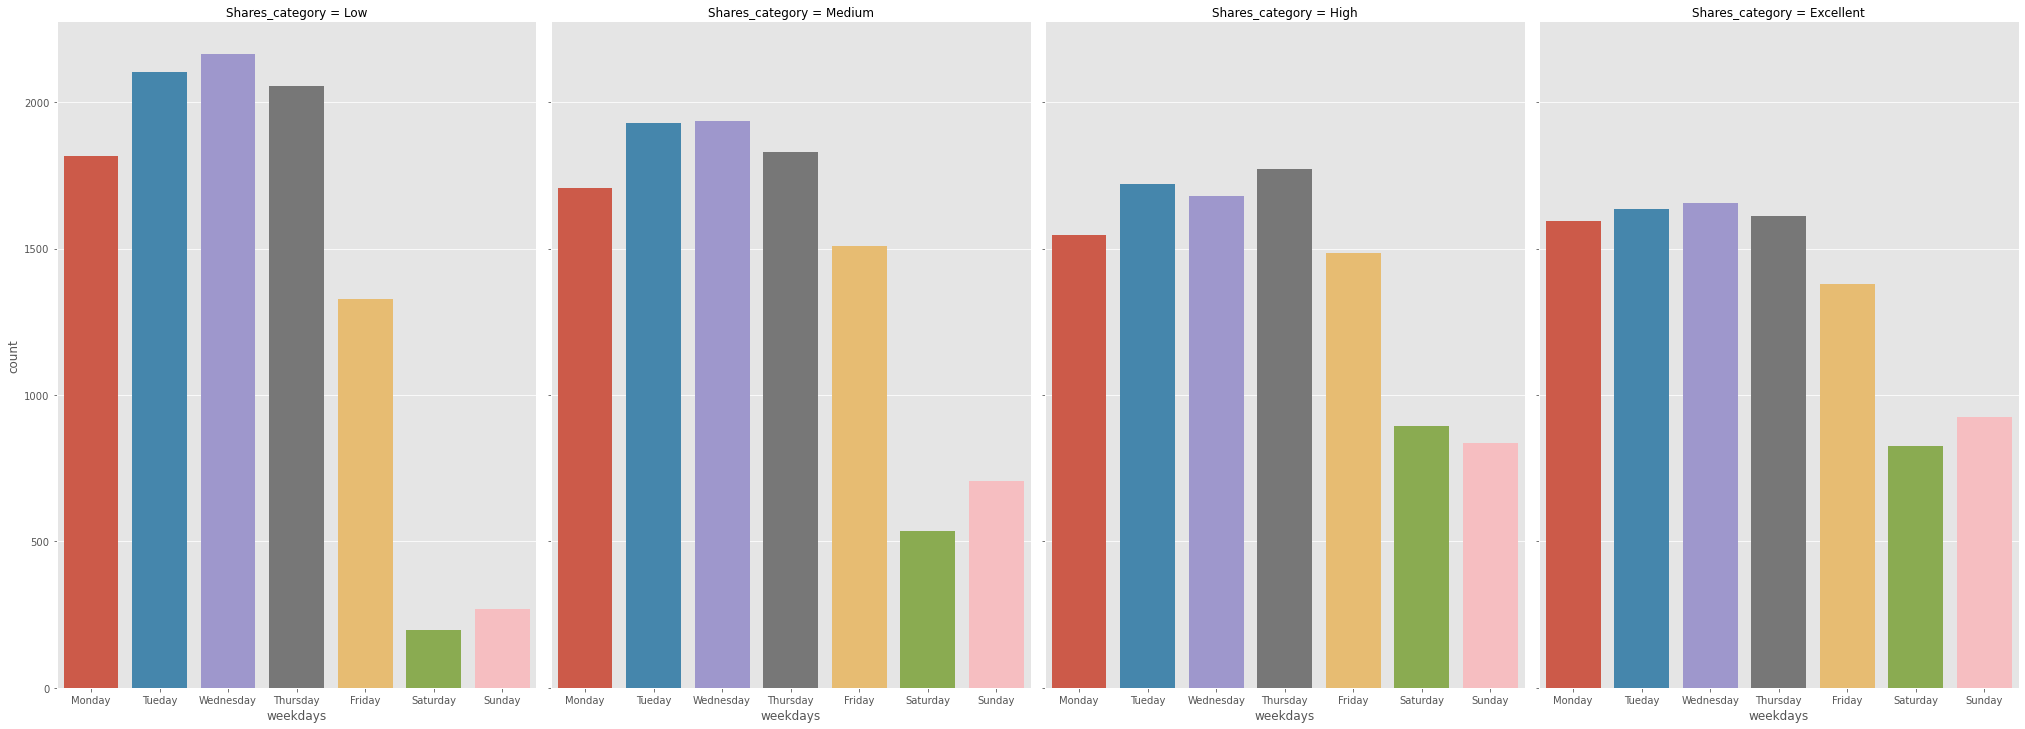

In [31]:


# shows relationship with the number of shares and the weekdays
temp_data = data[(data['Shares_category'] == 'Low') | (data['Shares_category'] == 'Medium') | (data['Shares_category'] == 'High') | (data['Shares_category'] == 'Excellent')]
ax = sns.catplot(x='weekdays', col="Shares_category", data=temp_data, kind="count", height=10, aspect=.7)

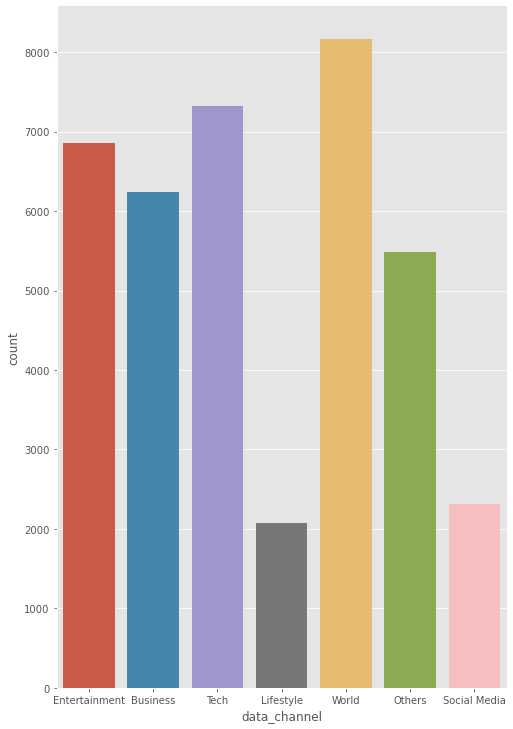

In [32]:
# Shows the distribution of the articles across the channels
sns.catplot(x='data_channel', data=df, kind="count", height=10, aspect=.7)

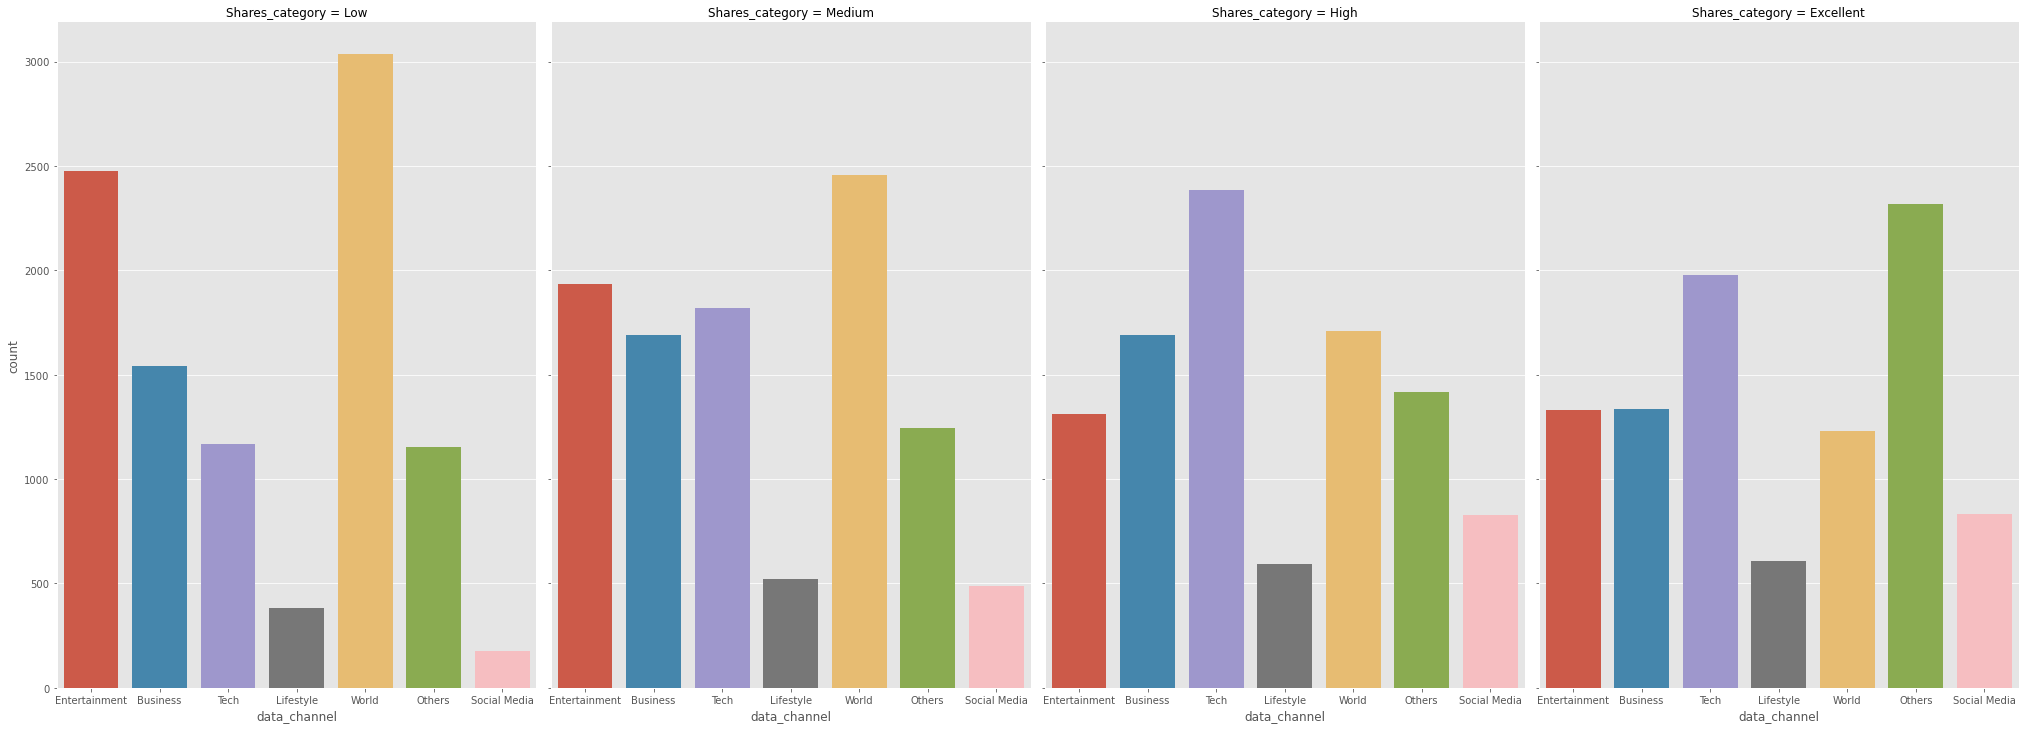

In [33]:
# shows relationship with the number of shares and the weekdays
temp_data = data[(data['Shares_category'] == 'Low') | (data['Shares_category'] == 'Medium') | (data['Shares_category'] == 'High') | (data['Shares_category'] == 'Excellent')]
ax = sns.catplot(x='data_channel', col="Shares_category", data=temp_data, kind="count", height=10, aspect=.7)

<AxesSubplot:xlabel='Shares_category', ylabel='num_imgs'>

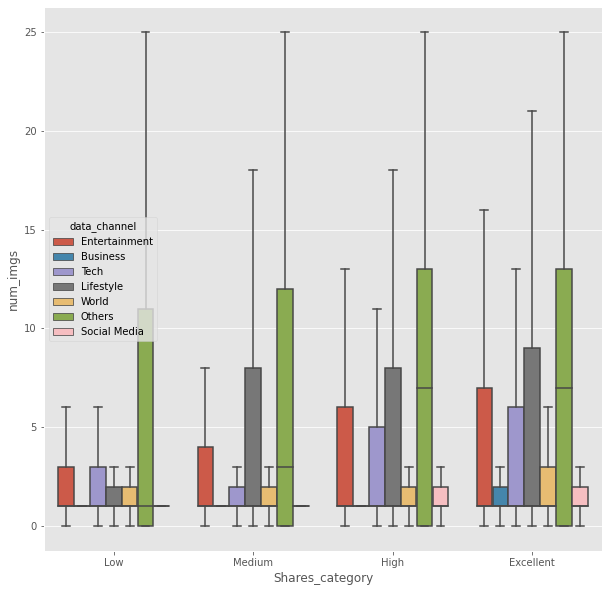

In [34]:
fig,ax = plt.subplots(figsize=(10,10))
temp_data = df[df['num_imgs'] <= 25]
sns.boxplot(x='Shares_category',y='num_imgs', hue='data_channel', data=temp_data, showfliers=False)

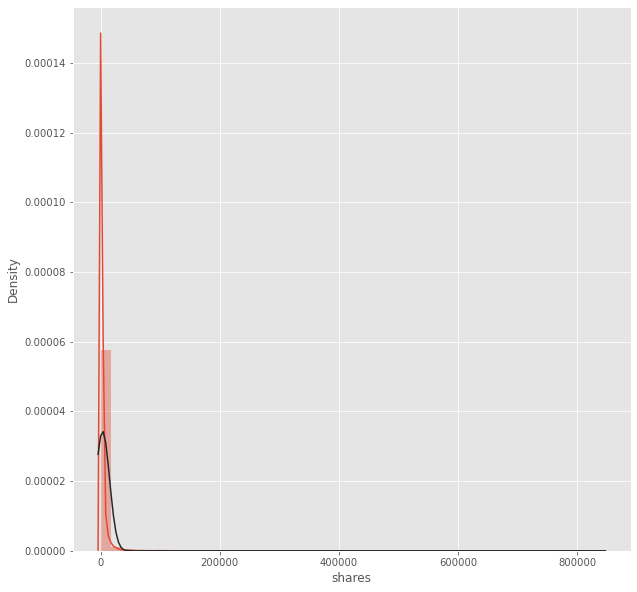

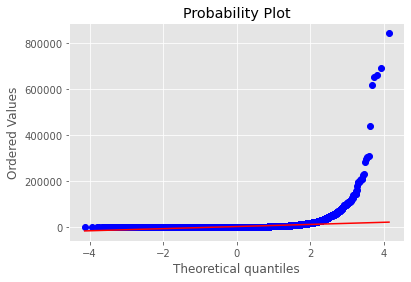

In [35]:
from scipy.stats import norm, probplot

#histogram and normal probability plot
temp_data = data[data['shares'] <= 100000]
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(data['shares'], fit=norm);
fig = plt.figure()
res = probplot(data['shares'], plot=plt)

#### Although shares doesn't have a normal distrubition, we can do a log transformation to give us a normal distrubition data

In [36]:
from copy import copy

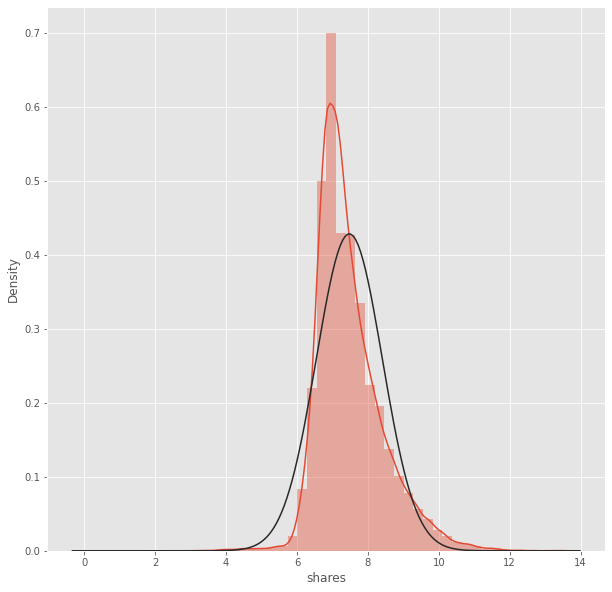

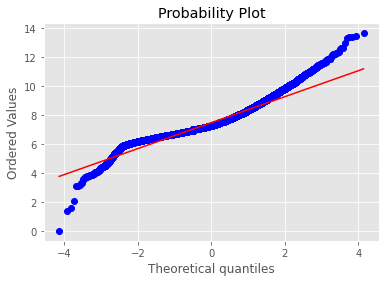

In [37]:
#applying log transformation
new_shares_data = copy(data)

new_shares_data.loc[new_shares_data['shares'] > 0, 'shares'] = np.log(data.loc[data['shares'] > 0, 'shares'])
new_shares_log = new_shares_data['shares']
#transformed histogram and normal probability plot
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(new_shares_log, fit=norm);
fig = plt.figure()
res = probplot(new_shares_log, plot=plt)

### Machine Learning - Supervised Learning Classification
- Here, we are going to apply some machine learing models on our dataset for classifying an article popularity


In [38]:
le=LabelEncoder()
df['weekdays']=le.fit_transform(df['weekdays'])
df['data_channel']=le.fit_transform(df['data_channel'])
df['Shares_category']=le.fit_transform(df['Shares_category'])

In [39]:
X=df.iloc[:,:-2]
Y=df.iloc[:,-1]

In [40]:
Y=le.fit_transform(Y)

### Feature Selection

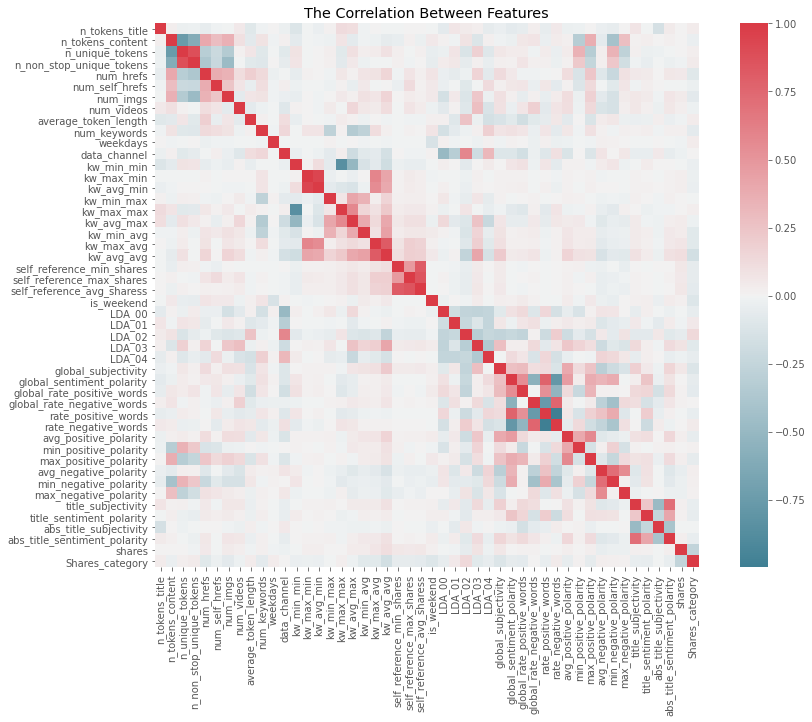

In [41]:
f, ax = plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

In [42]:
fvalue_selector = SelectKBest(f_classif, k=30)
X_kbest = fvalue_selector.fit_transform(X, Y)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

mask = fvalue_selector.get_support() #list of booleans
selectedFeatures = [] # The list of your K best features

for bool, feature in zip(mask, X.columns.values):
    if bool:
        selectedFeatures.append(feature)

print(selectedFeatures)

Original number of features: 46
Reduced number of features: 30
['n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_imgs', 'num_keywords', 'weekdays', 'kw_min_min', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'title_sentiment_polarity', 'abs_title_sentiment_polarity']


In [43]:
# plt.figure(figsize=(20,20))
# sns.pairplot(df, hue='Shares_category', vars = selectedFeatures[:4])

In [44]:
X = df[selectedFeatures]

In [45]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.61989645, 0.79041615, 0.01315789, ..., 0.65      , 0.40625   ,
        0.1875    ],
       [0.55340045, 0.76380791, 0.00986842, ..., 0.88125   , 0.5       ,
        0.        ],
       [0.51994019, 0.61840474, 0.00986842, ..., 0.53333333, 0.5       ,
        0.        ],
       ...,
       [0.45353118, 0.59599791, 0.07894737, ..., 0.64356061, 0.56818182,
        0.13636364],
       [0.47967491, 0.65109416, 0.03289474, ..., 0.79475446, 0.5       ,
        0.        ],
       [0.66327578, 0.82534679, 0.00328947, ..., 0.8       , 0.625     ,
        0.25      ]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.3,shuffle=True,stratify=Y)

#### KNN Classifier

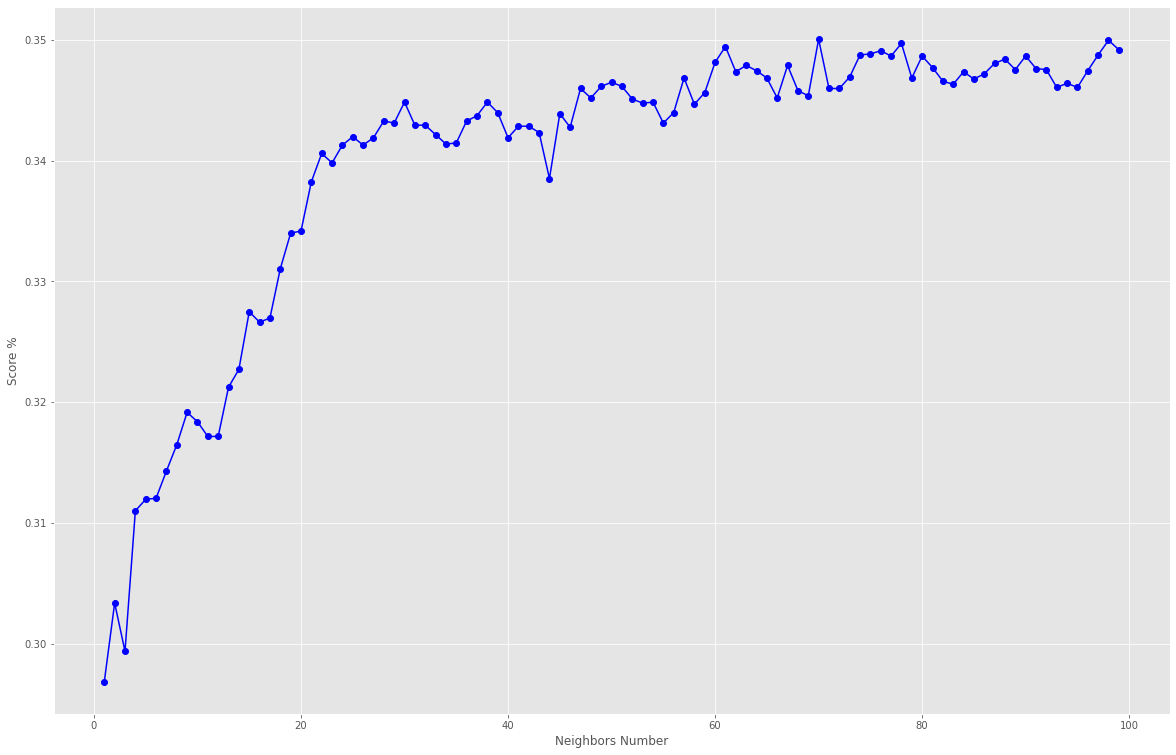

In [47]:
# KNN test run to determine the optimal n_neighbors
knn_valid_score_list=[]
n_neighbors_num = np.arange(1,100)

for i in n_neighbors_num:
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(X_train, y_train)
    knn_valid_score_list.append(test_knn.score(X_test, y_test))
plt.figure(figsize=(20,13))    
plt.plot(n_neighbors_num,  knn_valid_score_list, "b")
plt.plot(n_neighbors_num,  knn_valid_score_list, "bo")
plt.xlabel("Neighbors Number")
plt.ylabel("Score %")
plt.grid(True)
plt.show()

In [48]:
# Model Build
# Fitting classifier to the Training set
KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, 
                           metric='minkowski',metric_params=None, 
                           n_jobs=None, n_neighbors=100, p=2,
                           weights='uniform')
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [49]:
# Model Prediction
y_pred_KNN = KNN.predict(X_test)


In [50]:
prf_knn=precision_recall_fscore_support(y_test, y_pred_KNN, average='macro')
# Model Evaluation Methods
score_KNN = accuracy_score(y_pred_KNN, y_test)
accuracy_results_KNN = cross_val_score(KNN, X_train, y_train, cv=kfold).mean()
Precision_KNN = prf_knn[0]
Recall_KNN = prf_knn[1]
f1_KNN = prf_knn[2]

In [51]:
print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[ 937  735  674  429]
 [ 701  844  801  552]
 [ 344  422 1575  558]
 [ 543  652 1120  652]]
              precision    recall  f1-score   support

           0       0.37      0.34      0.35      2775
           1       0.32      0.29      0.30      2898
           2       0.38      0.54      0.45      2899
           3       0.30      0.22      0.25      2967

    accuracy                           0.35     11539
   macro avg       0.34      0.35      0.34     11539
weighted avg       0.34      0.35      0.34     11539



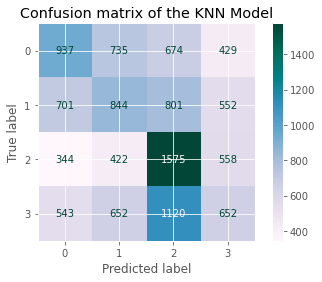

In [52]:
plot_confusion_matrix(KNN,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the KNN Model')
plt.show()

#### Random Forest Classifier

In [53]:
rfc = RandomForestClassifier(n_estimators=1000,n_jobs=5, max_depth=50,
                                 random_state=0)
#Fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=1000, n_jobs=5,
                       random_state=0)

In [54]:
y_pred_rfc = rfc.predict(X_test)
prf_rfc=precision_recall_fscore_support(y_test, y_pred_rfc, average='macro')

In [55]:
# Model Evaluation Methods
score_rfc = accuracy_score(y_pred_rfc, y_test)
accuracy_results_rfc = cross_val_score(rfc, X_train, y_train, cv=kfold).mean()
Precision_rfc = prf_rfc[0]
Recall_rfc = prf_rfc[1]
f1_rfc = prf_rfc[2]

In [56]:
print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[1309  688  421  357]
 [ 862  873  600  563]
 [ 416  383 1527  573]
 [ 635  673  930  729]]
              precision    recall  f1-score   support

           0       0.41      0.47      0.44      2775
           1       0.33      0.30      0.32      2898
           2       0.44      0.53      0.48      2899
           3       0.33      0.25      0.28      2967

    accuracy                           0.38     11539
   macro avg       0.38      0.39      0.38     11539
weighted avg       0.38      0.38      0.38     11539



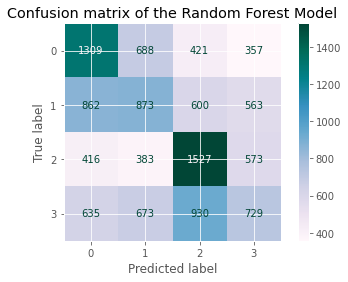

In [57]:
plot_confusion_matrix(rfc,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the Random Forest Model')
plt.show()

#### SVM - Support Vector Machines

In [58]:
svc = SVC( kernel='rbf',gamma='auto')
svc.fit(X_train,y_train)

SVC(gamma='auto')

In [59]:
y_pred_svm = svc.predict(X_test)
prf_svc=precision_recall_fscore_support(y_test, y_pred_svm, average='macro')

In [60]:
# Model Evaluation Methods
score_svc = accuracy_score(y_pred_svm, y_test)
accuracy_results_svc = cross_val_score(svc, X_train, y_train, cv=kfold).mean()
Precision_svc = prf_svc[0]
Recall_svc = prf_svc[1]
f1_svc = prf_svc[2]

In [61]:
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[ 687 1188  696  204]
 [ 473 1332  816  277]
 [ 302  724 1617  256]
 [ 443 1039 1152  333]]
              precision    recall  f1-score   support

           0       0.36      0.25      0.29      2775
           1       0.31      0.46      0.37      2898
           2       0.38      0.56      0.45      2899
           3       0.31      0.11      0.16      2967

    accuracy                           0.34     11539
   macro avg       0.34      0.34      0.32     11539
weighted avg       0.34      0.34      0.32     11539



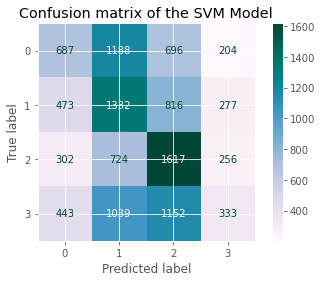

In [62]:
plot_confusion_matrix(svc,X_test, y_test, cmap='PuBuGn')
plt.title('Confusion matrix of the SVM Model')
plt.show()

#### Learning Curves
- here we plot the learning curves for all the models to give extra insight on the performance of the model

In [63]:
knn_train_sizes, knn_train_scores, knn_valid_scores, *_ = learning_curve(KNN, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

svm_train_sizes, svm_train_scores, svm_valid_scores, *_ = learning_curve(svc, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

rf_train_sizes, rf_train_scores, rf_valid_scores, *_ = learning_curve(rfc, X_train, y_train, n_jobs=-1,
                                                        random_state=42, cv=3)

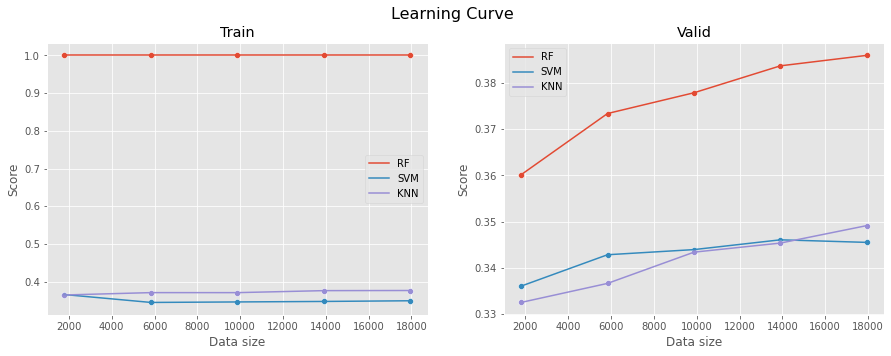

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Score')
axes[0].legend(['RF', 'SVM', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Score')
axes[1].legend(['RF', 'SVM', 'KNN'])
plt.show()

### Models' Performance Evaluation Table

the below table compares the applied models using different evaluation metrics which are: model.score,Cross Validation, Precision, Recall, F1 Score in order to see which model is the optimal model for this dataset

In [65]:
model_performance_table = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'RF'],
    'Model Score': [score_svc, score_KNN, score_rfc],
    'Cross Validation': [accuracy_results_svc, accuracy_results_KNN, accuracy_results_rfc],
    'Valid Precision': [Precision_svc, Precision_KNN, Precision_rfc],
    'Valid Recall': [Recall_svc, Recall_KNN, Recall_rfc],
    'Valid F1 Score': [f1_svc, f1_KNN, f1_rfc]
})

model_performance_table.sort_values(by="Model Score", ascending=False)

,Model,Model Score,Cross Validation,Valid Precision,Valid Recall,Valid F1 Score
2,RF,0.384609,0.385581,0.376746,0.386348,0.378258
1,KNN,0.347344,0.349924,0.341125,0.347984,0.339023
0,SVM,0.343964,0.346322,0.340139,0.344302,0.319990
